In [20]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [21]:
tf.random.set_seed(12345)

In [22]:
df = pd.read_csv('alicante_Alipark_Flow.csv')

In [23]:
df

,time,value
0,1.588284e+09,11.0
1,1.588286e+09,9.2
2,1.588288e+09,11.0
3,1.588289e+09,6.8
4,1.588291e+09,8.8
...,...,...
19465,1.625449e+09,5.4
19466,1.625450e+09,7.4
19467,1.625452e+09,12.4
19468,1.625454e+09,11.8


In [24]:
df = df.drop_duplicates(subset = 'time', keep='first')

In [25]:
df = df.reset_index(drop=True)

In [26]:
Time = []

for i in range(0, len(df)):
    Time.append(datetime.datetime.fromtimestamp(df['time'][i]).strftime('%Y-%m-%d %H:%M:%S'))

In [27]:
df['time'] = Time

In [28]:
df['value'].isnull().sum()

0

In [29]:
df.columns = ['Time','Values']

In [30]:
df

,Time,Values
0,2020-04-30 22:00:00,11.0
1,2020-04-30 22:30:00,9.2
2,2020-04-30 23:00:00,11.0
3,2020-04-30 23:30:00,6.8
4,2020-05-01 00:00:00,8.8
...,...,...
19417,2021-07-05 01:30:00,5.4
19418,2021-07-05 02:00:00,7.4
19419,2021-07-05 02:30:00,12.4
19420,2021-07-05 03:00:00,11.8


In [31]:
df.to_csv('data_alipark.csv')

In [32]:
df['Values'].isnull().sum()

0

In [33]:
Values = df['Values'].values

In [34]:
Values.shape

(19422,)

In [35]:
import numpy.ma as ma

In [36]:
X = ma.masked_invalid(Values).reshape(-1,1)
X[X==0]=ma.masked

In [37]:
X.min()

1.6

In [38]:
from sklearn.preprocessing import MinMaxScaler
# Function for Scaler Application
def Scaler(X):
    minX = X.min()
    X+=minX
    maxX = X.max()
    X = X/maxX
    return minX,maxX,X

In [39]:
minX,maxX,scaled_x = Scaler(ma.compress_rows(X))

In [40]:
scaled_x.max()

1.0

In [41]:
X[-100:]

masked_array(
  data=[[4.4],
        [4.2],
        [3.6],
        [4.4],
        [4.8],
        [6.2],
        [5.8],
        [10.4],
        [12.8],
        [16.0],
        [20.8],
        [24.2],
        [26.8],
        [26.2],
        [24.0],
        [24.2],
        [24.4],
        [25.2],
        [21.8],
        [22.0],
        [24.0],
        [20.4],
        [21.8],
        [22.0],
        [20.0],
        [17.2],
        [19.0],
        [17.0],
        [22.4],
        [18.2],
        [17.4],
        [19.2],
        [17.8],
        [21.8],
        [19.2],
        [17.8],
        [19.0],
        [18.0],
        [18.4],
        [16.2],
        [16.4],
        [14.0],
        [11.6],
        [9.4],
        [8.8],
        [6.8],
        [6.6],
        [10.2],
        [7.2],
        [7.8],
        [7.6],
        [7.6],
        [5.8],
        [7.0],
        [5.8],
        [8.4],
        [10.8],
        [15.4],
        [15.8],
        [19.8],
        [23.6],
        [25.6],
        [22.6

In [42]:
scaled_x.min()

0.04347826086956522

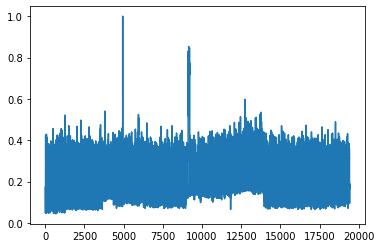

In [43]:
plt.plot(scaled_x)
plt.show()

In [44]:
scaled_x*maxX-minX

array([[11. ],
       [ 9.2],
       [11. ],
       ...,
       [12.4],
       [11.8],
       [10.6]])

In [45]:
scaled_X = ma.zeros(X.shape)
scaled_X[~X.mask[:,0]] = scaled_x
scaled_X[X.mask] = ma.masked


In [46]:
import h5py

In [47]:
f = h5py.File("alipark_processed_data.h5","w")
v_ = f.create_dataset("raw_values",shape=Values.shape,dtype="float")
v_[...] = Values

x_ = f.create_dataset("scaled_x",shape=scaled_X.shape,dtype="float")
x_[...] = scaled_X

minx_ = f.create_dataset("minX",shape=(1,),dtype="float")
minx_[...] = minX

maxx_ = f.create_dataset("maxX",shape=(1,),dtype="float")
maxx_[...] = maxX


x_mask = f.create_dataset("x_mask",shape=scaled_X.shape,dtype="Bool")
x_mask[...] = scaled_X.mask

f.close()

In [48]:
f = h5py.File("alipark_processed_data.h5","r")
scaled_X_ = ma.array(f["scaled_x"])
scaled_X_.mask = ma.array(f["x_mask"])
f.close()

In [49]:
import matplotlib.pyplot as plt

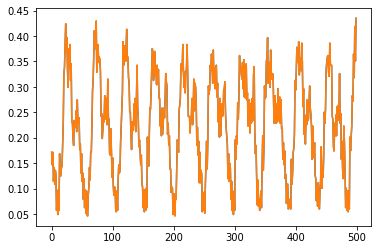

In [50]:
plt.plot(scaled_X_[:500])
plt.plot(scaled_X[:500])
plt.show()

In [1]:
import re #python regular expression matching module
script = re.sub(r'# In\[.*\]:\n','',open('1.0-DataPreparation.py').read())
with open('1.0-DataPreparationScript.py','w') as fh:
    fh.write(script)